# Aula 1

## Carregando os dados

In [1]:
import pandas as pd

In [23]:
url1 = '/home/giovana/Área de Trabalho/Implementações/Projeto/Dados/sITE/MGLU3.SA.csv'

In [44]:
petro = pd.read_csv(url1)

In [45]:
petro.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-05-03,0.515625,0.521562,0.50625,0.509375,0.459283,33670400.0
1,2011-05-04,0.510000,0.515000,0.51000,0.515000,0.464355,39203200.0
2,2011-05-05,0.512812,0.512812,0.51000,0.511875,0.461537,35097600.0
3,2011-05-06,0.510937,0.511875,0.50000,0.508125,0.458156,38672000.0
4,2011-05-09,0.506562,0.507812,0.50125,0.503125,0.453647,667680.0


In [9]:
# Renomear Colunas

#passageiros.columns = ['tempo','passageiros']

In [29]:
import seaborn as sns

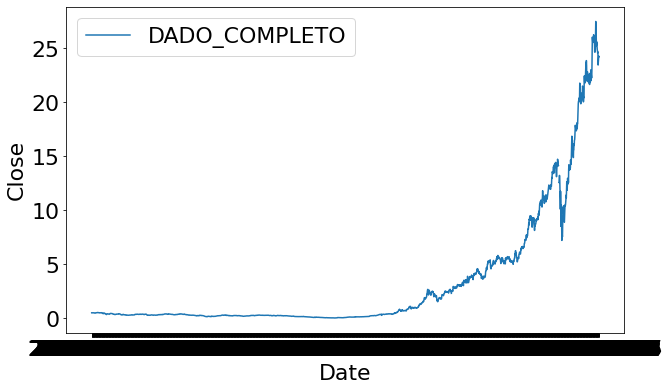

In [34]:
sns.lineplot(x='Date', y='Close', data=petro, label = 'DADO_COMPLETO')

In [15]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['font.size'] = 22

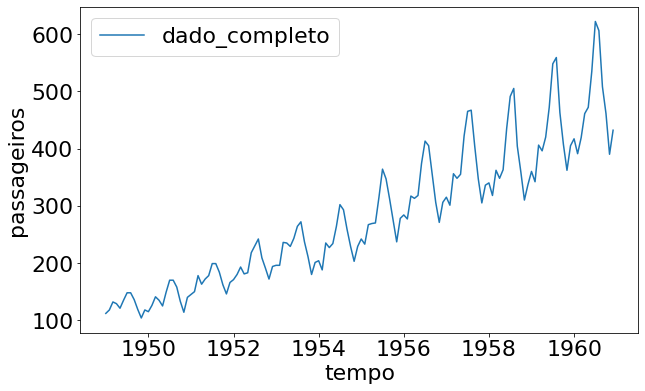

In [16]:
#sns.lineplot(x='tempo',y='passageiros', data=passageiros,label='dado_completo') 

In [46]:
petro = petro.drop(columns=['Date'])

In [58]:
petro


,Open,High,Low,Close,Adj Close,Volume
0,0.515625,0.521562,0.506250,0.509375,0.459283,33670400.0
1,0.510000,0.515000,0.510000,0.515000,0.464355,39203200.0
2,0.512812,0.512812,0.510000,0.511875,0.461537,35097600.0
3,0.510937,0.511875,0.500000,0.508125,0.458156,38672000.0
4,0.506562,0.507812,0.501250,0.503125,0.453647,667680.0
...,...,...,...,...,...,...
2374,24.299999,24.370001,23.219999,23.420000,23.395634,59639700.0
2375,23.370001,23.969999,22.900000,23.700001,23.675343,57465100.0
2376,23.670000,24.309999,23.520000,24.000000,23.975031,38914800.0
2377,23.900000,24.299999,23.820000,24.250000,24.224770,23108700.0


## Escalando os dados

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
sc = StandardScaler() 

In [53]:
sc.fit(petro) #aJUSTANDO O sTANDARd sCALER AOS DADOS

StandardScaler(copy=True, with_mean=True, with_std=True)

In [54]:
dado_escalado = sc.transform(petro)

In [61]:
dado_escalado

array([[-0.47794998, -0.47898671, -0.47733043, -0.47912783, -0.47981596,
        -0.09364858],
       [-0.47896998, -0.48015344, -0.47663592, -0.47810768, -0.47888957,
         0.0852884 ],
       [-0.47846007, -0.48054247, -0.47663592, -0.47867443, -0.47940427,
        -0.04749133],
       ...,
       [ 3.72070934,  3.75062489,  3.78486292,  3.7811632 ,  3.81528098,
         0.07596122],
       [ 3.762416  ,  3.74884687,  3.84042353,  3.82650354,  3.86089523,
        -0.43522585],
       [ 3.83857599,  3.79329716,  3.85894374,  3.81562204,  3.84994788,
        -0.01424465]])

In [59]:
x=dado_escalado[:, :4] #Features - Características - Tempo
y=dado_escalado[:,4] #Alvo - Número de passageiros

In [63]:
y

array([-0.47981596, -0.47888957, -0.47940427, ...,  3.81528098,
        3.86089523,  3.84994788])

In [64]:
import matplotlib.pyplot as plt

In [65]:
sns.lineplot(x=x,y=y,label='dado_escalado') 
plt.ylabel('Passageiros')
plt.xlabel('Data')

Exception: Data must be 1-dimensional

## Dividindo em treino e teste

In [60]:
tamanho_treino = int(len(passageiros)*0.9) #Pegando 90% dos dados para treino
tamanho_teste = len(passageiros)-tamanho_treino #O resto vamos reservar para teste

In [61]:
xtreino = x[0:tamanho_treino]
ytreino = y[0:tamanho_treino]

In [62]:
xteste = x[tamanho_treino:len(passageiros)]
yteste = y[tamanho_treino:len(passageiros)]

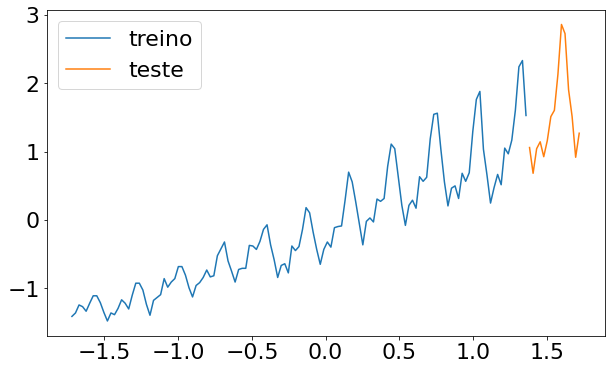

In [63]:
sns.lineplot(x=xtreino,y=ytreino,label='treino') 
sns.lineplot(x=xteste,y=yteste,label='teste') 

# Aula 2

## Regressão Linear

In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [65]:
regressor = Sequential()

In [66]:
regressor.add(Dense(1, input_dim=1, kernel_initializer='Ones', 
                    activation='linear',use_bias=False))

In [67]:
regressor.compile(loss='mean_squared_error',optimizer='adam')

In [68]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 1         
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [69]:
regressor.fit(xtreino,ytreino)

5/5 [==============================] - 0s 2ms/step - loss: 0.1121


In [70]:
y_predict= regressor.predict(xtreino) #Prevendo os dados de treino (o ajuste)

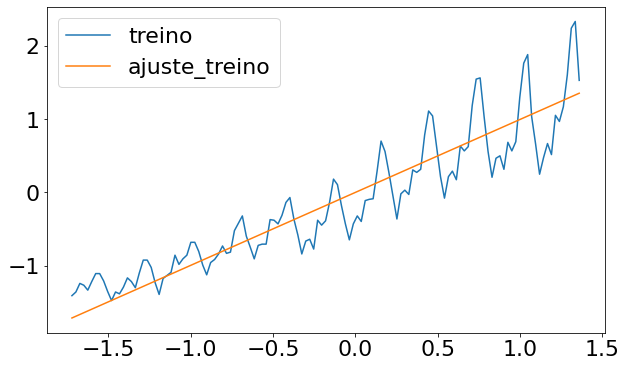

In [71]:
sns.lineplot(x=xtreino,y=ytreino,label='treino')
sns.lineplot(x=xtreino,y=y_predict[:,0],label='ajuste_treino')

In [72]:
d = {'tempo': xtreino, 'passageiros': y_predict[:,0]}
resultados = pd.DataFrame(data=d)

In [73]:
resultados

,tempo,passageiros
0,-1.720064,-1.711946
1,-1.696007,-1.688003
2,-1.671950,-1.664059
3,-1.647894,-1.640116
4,-1.623837,-1.616173
...,...,...
124,1.262984,1.257023
125,1.287041,1.280967
126,1.311098,1.304910
127,1.335155,1.328853


In [74]:
resultado_transf = sc.inverse_transform(resultados)

In [75]:
resultado_transf = pd.DataFrame(resultado_transf)
resultado_transf.columns = ['tempo','passageiros']

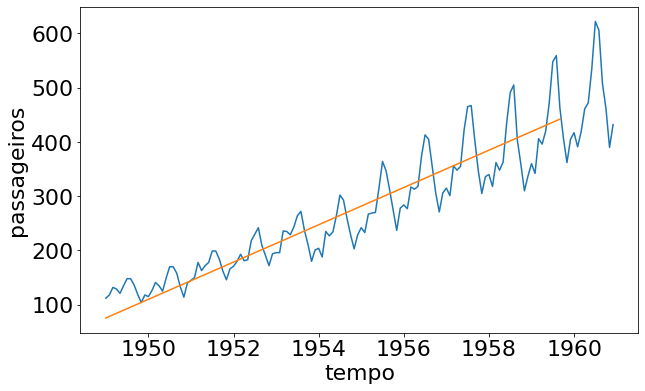

In [76]:
sns.lineplot(x="tempo",y="passageiros",data=passageiros)
sns.lineplot(x="tempo",y="passageiros",data=resultado_transf)

In [77]:
y_predict_teste= regressor.predict(xteste) #Prevendo os dados de teste(o futuro)

In [78]:
d = {'tempo': xteste, 'passageiros': y_predict_teste[:,0]}
resultados_teste = pd.DataFrame(data=d)

In [79]:
resultado_transf_teste = sc.inverse_transform(resultados_teste)

In [80]:
resultado_transf_teste = pd.DataFrame(resultado_transf_teste)
resultado_transf_teste.columns = ['tempo','passageiros']

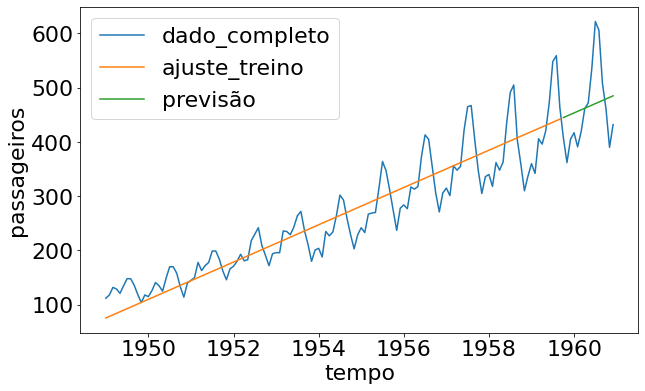

In [81]:
sns.lineplot(x="tempo",y="passageiros",data=passageiros,label='dado_completo')
sns.lineplot(x="tempo",y="passageiros",data=resultado_transf,label='ajuste_treino')
sns.lineplot(x="tempo",y="passageiros",data=resultado_transf_teste,label='previsão')

## Regressão não-linear

In [82]:
regressor2 = Sequential()

In [83]:
regressor2.add(Dense(8, input_dim=1, kernel_initializer='random_uniform', 
                     activation='sigmoid',use_bias=False)) 
regressor2.add(Dense(8, kernel_initializer='random_uniform', 
                     activation='sigmoid',use_bias=False))
regressor2.add(Dense(1, kernel_initializer='random_uniform', 
                     activation='linear',use_bias=False))

In [84]:
regressor2.compile(loss='mean_squared_error',optimizer='adam')
regressor2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 8)                 8         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 64        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 8         
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [89]:
regressor2.fit(xtreino,ytreino,epochs =100
              )

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 0.7511
Epoch 2/100
5/5 [==============================] - 0s 1ms/step - loss: 0.7127
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6513
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6524
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 1.6992
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6620
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6946
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 0.8742
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6407
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6504
Epoch 11/100
5/5 [==============================] - 0s 3ms/step - loss: 0.7569
Epoch 12/100
5/5 [==============================] - 0s 2ms/step - loss: 0.7725
Epoch 13/100
5/5 [==============================] - 0s 3ms/st

In [90]:
y_predict= regressor2.predict(xtreino) #Prevendo os dados de treino (o ajuste)

In [91]:
y_predict_teste= regressor2.predict(xteste) #Prevendo os dados de teste(o futuro)

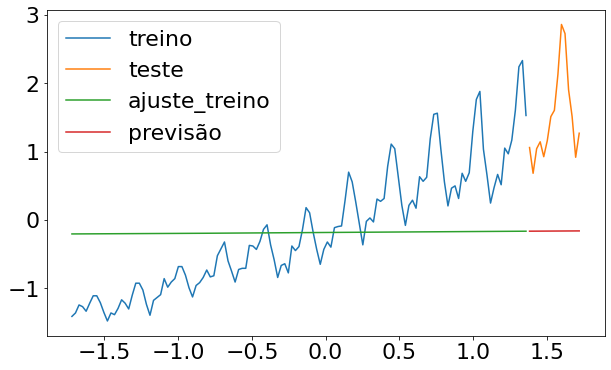

In [92]:
sns.lineplot(x=xtreino,y=ytreino,label='treino')
sns.lineplot(x=xteste,y=yteste,label='teste')
sns.lineplot(x=xtreino,y=y_predict[:,0],label='ajuste_treino')
sns.lineplot(x=xteste,y=y_predict_teste[:,0],label='previsão')

# Aula 3

## Alterando a forma como passamos os dados

Agora x e y vão valores diferentes. X vai conter o número de passageiros em um tempo anterior e y vai conter o número de passageiros em t+1, por exemplo. 

In [93]:
vetor = pd.DataFrame(ytreino)[0]

In [94]:
import numpy as np

In [85]:
def separa_dados(vetor,n_passos):
  """Entrada: vetor: número de passageiros
               n_passos: número de passos no regressor
     Saída:
              X_novo: Array 2D 
              y_novo: Array 1D - Nosso alvo
  """
  X_novo, y_novo = [], []
  for i in range(n_passos,vetor.shape[0]):
    X_novo.append(list(vetor.loc[i-n_passos:i-1]))
    y_novo.append(vetor.loc[i])
  X_novo, y_novo = np.array(X_novo), np.array(y_novo) 
  return X_novo, y_novo

In [96]:
xtreino_novo, ytreino_novo = separa_dados(vetor,1)

In [97]:
xtreino_novo[0:5] #X

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [98]:
ytreino_novo[0:5] #y

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

## Agora vamos separar o teste

In [99]:
vetor2 = pd.DataFrame(yteste)[0]

In [100]:
xteste_novo, yteste_novo = separa_dados(vetor2,1)

## Voltando para as redes neurais

In [101]:
regressor3 = Sequential()

In [102]:
regressor3.add(Dense(8, input_dim=1, kernel_initializer='ones', activation='linear',use_bias=False))
regressor3.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid',use_bias=False))
regressor3.add(Dense(1, kernel_initializer='random_uniform', activation='linear',use_bias=False))
regressor3.compile(loss='mean_squared_error',optimizer='adam')
regressor3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 8)                 8         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 64        
Total params: 584
Trainable params: 584
Non-trainable params: 0
_________________________________________________________________


In [103]:
regressor3.fit(xtreino_novo,ytreino_novo,epochs =100)

Epoch 1/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7768
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7476
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7246
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7045
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 0.6811
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6586
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6322
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6044
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5751
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 0.5404
Epoch 11/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5070
Epoch 12/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4678
Epoch 13/100
4/4 [==============================] - 0s 2ms/st

In [104]:
y_predict_novo = regressor3.predict(xtreino_novo)

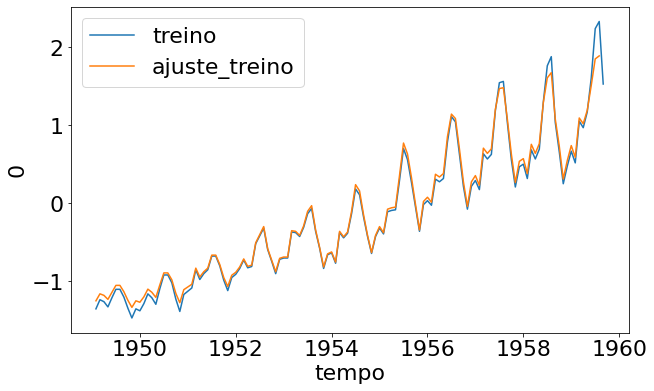

In [105]:
sns.lineplot(x='tempo',y=ytreino_novo,data=passageiros[1:129],label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=passageiros[1:129],label='ajuste_treino')

In [106]:
y_predict_teste_novo = regressor3.predict(xteste_novo)

In [107]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

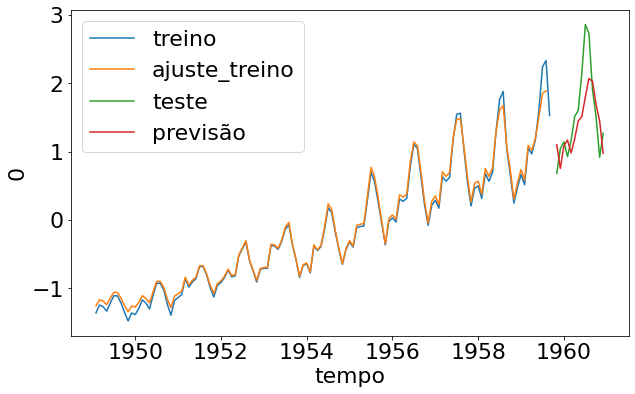

In [108]:
sns.lineplot(x='tempo',y=ytreino_novo,data=passageiros[1:129],label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=passageiros[1:129],label='ajuste_treino')

sns.lineplot(x='tempo',y=yteste_novo,data=passageiros[130:144],label='teste')
sns.lineplot(x='tempo',y=resultado.values,data=passageiros[130:144],label='previsão')

## Janelas

In [109]:
xtreino_novo, ytreino_novo = separa_dados(vetor,4)

In [110]:
xtreino_novo[0:5] #X

array([[-1.40777884, -1.35759023, -1.24048348, -1.26557778],
       [-1.35759023, -1.24048348, -1.26557778, -1.33249593],
       [-1.24048348, -1.26557778, -1.33249593, -1.21538918],
       [-1.26557778, -1.33249593, -1.21538918, -1.10664719],
       [-1.33249593, -1.21538918, -1.10664719, -1.10664719]])

In [111]:
ytreino_novo[0:5] #y

array([-1.33249593, -1.21538918, -1.10664719, -1.10664719, -1.20702441])

In [112]:
xteste_novo, yteste_novo = separa_dados(vetor2,4)

In [113]:
regressor4 = Sequential()

In [114]:
regressor4.add(Dense(8, input_dim=4, kernel_initializer='random_uniform', activation='linear',use_bias=False)) #relu
regressor4.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid',use_bias=False)) #relu
regressor4.add(Dense(1, kernel_initializer='random_uniform', activation='linear',use_bias=False))
regressor4.compile(loss='mean_squared_error',optimizer='adam')
regressor4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 8)                 32        
_________________________________________________________________
dense_9 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 64        
Total params: 608
Trainable params: 608
Non-trainable params: 0
_________________________________________________________________


In [115]:
regressor4.fit(xtreino_novo,ytreino_novo,epochs =300)

Epoch 1/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7874
Epoch 2/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7736
Epoch 3/300
4/4 [==============================] - 0s 1ms/step - loss: 0.7614
Epoch 4/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7579
Epoch 5/300
4/4 [==============================] - 0s 4ms/step - loss: 0.7631
Epoch 6/300
4/4 [==============================] - 0s 3ms/step - loss: 0.7518
Epoch 7/300
4/4 [==============================] - 0s 3ms/step - loss: 0.7422
Epoch 8/300
4/4 [==============================] - 0s 3ms/step - loss: 0.7406
Epoch 9/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7274
Epoch 10/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7257
Epoch 11/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7179
Epoch 12/300
4/4 [==============================] - 0s 1ms/step - loss: 0.7154
Epoch 13/300
4/4 [==============================] - 0s 2ms/st

Epoch 206/300
4/4 [==============================] - 0s 3ms/step - loss: 0.0652
Epoch 207/300
4/4 [==============================] - 0s 2ms/step - loss: 0.0649
Epoch 208/300
4/4 [==============================] - 0s 2ms/step - loss: 0.0646
Epoch 209/300
4/4 [==============================] - 0s 2ms/step - loss: 0.0645
Epoch 210/300
4/4 [==============================] - 0s 2ms/step - loss: 0.0647
Epoch 211/300
4/4 [==============================] - 0s 1ms/step - loss: 0.0639
Epoch 212/300
4/4 [==============================] - 0s 2ms/step - loss: 0.0637
Epoch 213/300
4/4 [==============================] - 0s 2ms/step - loss: 0.0634
Epoch 214/300
4/4 [==============================] - 0s 3ms/step - loss: 0.0637
Epoch 215/300
4/4 [==============================] - 0s 2ms/step - loss: 0.0635
Epoch 216/300
4/4 [==============================] - 0s 2ms/step - loss: 0.0636
Epoch 217/300
4/4 [==============================] - 0s 2ms/step - loss: 0.0633
Epoch 218/300
4/4 [=====================

In [116]:
y_predict_teste_novo = regressor4.predict(xteste_novo)

In [117]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

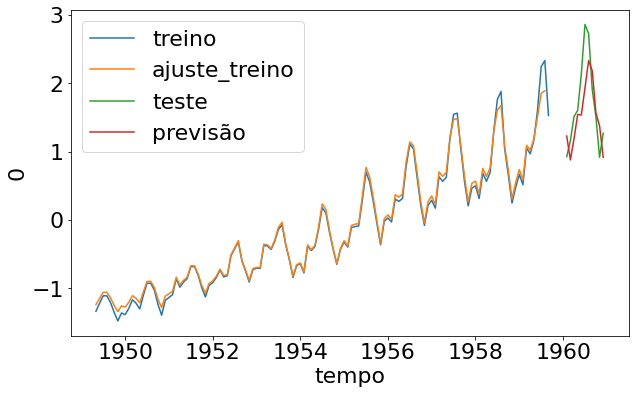

In [118]:
sns.lineplot(x='tempo',y=ytreino_novo,data=passageiros[4:129],label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=passageiros[4:129],label='ajuste_treino')

sns.lineplot(x='tempo',y=yteste_novo,data=passageiros[133:144],label='teste')
sns.lineplot(x='tempo',y=resultado.values,data=passageiros[133:144],label='previsão')

# Aula 4

## LSTMs

In [69]:
#Nova base de dados

In [70]:
url2 = 'https://raw.githubusercontent.com/alura-cursos/deeptime/aula5/bicicletas.csv'

In [71]:
bike = pd.read_csv(url2)

In [72]:
bike

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [73]:
bike['datas'] = pd.to_datetime(bike['datas'])

In [74]:
bike.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238., 736330.]),
 <a list of 9 Text major ticklabel objects>)

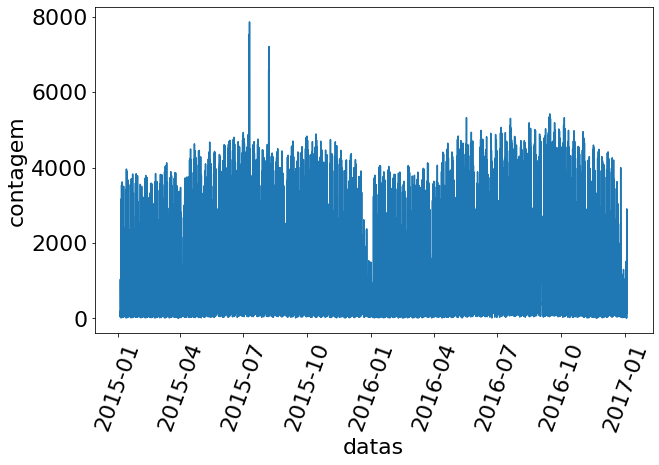

In [75]:
sns.lineplot(x='datas',y='contagem', data=bike)
plt.xticks(rotation=70)

## Escalando os dados

In [76]:
sc2 = StandardScaler()

In [77]:
sc2.fit(bike['contagem'].values.reshape(-1,1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [78]:
y = sc2.transform(bike['contagem'].values.reshape(-1,1))

## Dividindo em treino e teste

In [79]:
tamanho_treino = int(len(bike)*0.9) #Pegando 90% dos dados para treino
tamanho_teste = len(bike)-tamanho_treino #O resto vamos reservar para teste

In [80]:
ytreino = y[0:tamanho_treino]
yteste = y[tamanho_treino:len(bike)]

(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238., 736330.]),
 <a list of 9 Text major ticklabel objects>)

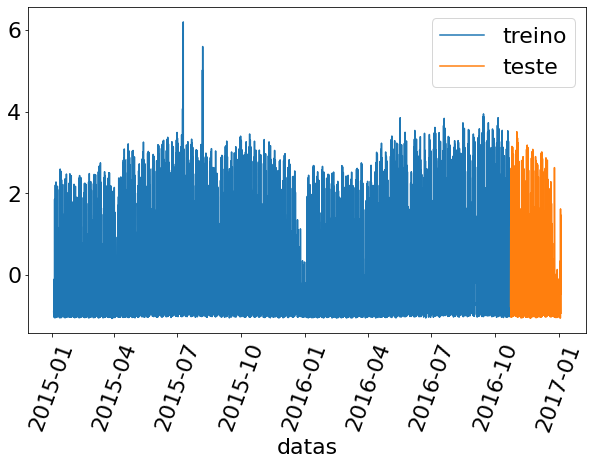

In [81]:
sns.lineplot(x='datas',y=ytreino[:,0],data=bike[0:tamanho_treino],label='treino') 
sns.lineplot(x='datas',y=yteste[:,0], data=bike[tamanho_treino:len(bike)],label='teste')
plt.xticks(rotation=70) 

In [82]:
vetor = pd.DataFrame(ytreino)[0]

In [83]:
vetor

0       -0.885745
1       -0.926295
2       -0.929982
3       -0.987120
4       -1.010160
           ...   
15667   -0.853489
15668   -0.915236
15669   -0.954865
15670   -0.954865
15671   -0.894040
Name: 0, Length: 15672, dtype: float64

In [87]:
import numpy as np

In [88]:
xtreino_novo, ytreino_novo = separa_dados(vetor,10)

In [89]:
xtreino_novo[0:5]

array([[-0.88574518, -0.9262953 , -0.92998167, -0.98712048, -1.01016032,
        -1.01108192, -1.00647395, -0.9843557 , -0.93274645, -0.77607553],
       [-0.9262953 , -0.92998167, -0.98712048, -1.01016032, -1.01108192,
        -1.00647395, -0.9843557 , -0.93274645, -0.77607553, -0.56687377],
       [-0.92998167, -0.98712048, -1.01016032, -1.01108192, -1.00647395,
        -0.9843557 , -0.93274645, -0.77607553, -0.56687377, -0.38347663],
       [-0.98712048, -1.01016032, -1.01108192, -1.00647395, -0.9843557 ,
        -0.93274645, -0.77607553, -0.56687377, -0.38347663, -0.25906149],
       [-1.01016032, -1.01108192, -1.00647395, -0.9843557 , -0.93274645,
        -0.77607553, -0.56687377, -0.38347663, -0.25906149, -0.20929543]])

In [90]:
ytreino_novo[0:5]

array([-0.56687377, -0.38347663, -0.25906149, -0.20929543, -0.09593941])

In [91]:
vetor2 = pd.DataFrame(yteste)[0]

In [113]:
vetor2

0      -0.759487
1      -0.367810
2       0.198971
3       0.697553
4       0.942697
          ...   
1737   -0.093175
1738   -0.554893
1739   -0.742898
1740   -0.847038
1741   -0.925374
Name: 0, Length: 1742, dtype: float64

#### from tensorflow.models import Se

In [92]:
xteste_novo, yteste_novo = separa_dados(vetor2,10)

## O que a LSTM espera

A entrada de redes recorrentes deve possuir a seguinte forma para a entrada (número de amostras, número de passos no tempo, e número de atributos por passo no tempo).

In [93]:
xtreino_novo = xtreino_novo.reshape((xtreino_novo.shape[0],xtreino_novo.shape[1],1))

In [94]:
xtreino_novo.shape

(15662, 10, 1)

In [95]:
xteste_novo = xteste_novo.reshape((xteste_novo.shape[0],xteste_novo.shape[1],1))

In [96]:
xteste_novo.shape

(1732, 10, 1)

## Usando a LSTM

In [97]:
from tensorflow.keras.layers import LSTM

In [100]:
recorrente = Sequential()

In [101]:
recorrente.add(LSTM(128, input_shape=(xtreino_novo.shape[1],xtreino_novo.shape[2])
                    ))
recorrente.add(Dense(units=1))

In [102]:
recorrente.compile(loss='mean_squared_error',optimizer='RMSProp')
recorrente.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [103]:
resultado = recorrente.fit(xtreino_novo,ytreino_novo,validation_data=(xteste_novo,yteste_novo),epochs=10)

Epoch 1/10
490/490 [==============================] - 6s 12ms/step - loss: 0.2688 - val_loss: 0.0605
Epoch 2/10
490/490 [==============================] - 5s 10ms/step - loss: 0.0755 - val_loss: 0.0448
Epoch 3/10
490/490 [==============================] - 5s 10ms/step - loss: 0.0556 - val_loss: 0.0459
Epoch 4/10
490/490 [==============================] - 5s 10ms/step - loss: 0.0467 - val_loss: 0.0302
Epoch 5/10
490/490 [==============================] - 5s 10ms/step - loss: 0.0422 - val_loss: 0.0272
Epoch 6/10
490/490 [==============================] - 5s 11ms/step - loss: 0.0388 - val_loss: 0.0339
Epoch 7/10
490/490 [==============================] - 5s 10ms/step - loss: 0.0373 - val_loss: 0.0235
Epoch 8/10
490/490 [==============================] - 5s 10ms/step - loss: 0.0354 - val_loss: 0.0239
Epoch 9/10
490/490 [==============================] - 5s 10ms/step - loss: 0.0340 - val_loss: 0.0206
Epoch 10/10
490/490 [==============================] - 5s 10ms/step - loss: 0.0324 - val_lo

In [104]:
y_ajustado = recorrente.predict(xtreino_novo)

(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238.]),
 <a list of 8 Text major ticklabel objects>)

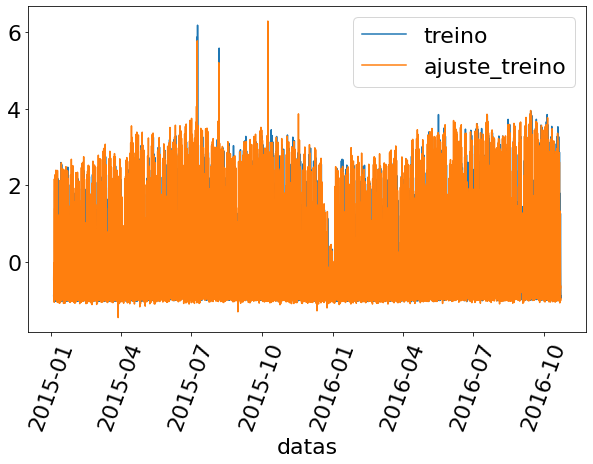

In [105]:
sns.lineplot(x='datas',y=ytreino[:,0],data=bike[0:tamanho_treino],label='treino')
sns.lineplot(x='datas',y=y_ajustado[:,0],data=bike[0:15662],label='ajuste_treino')
plt.xticks(rotation=70) 

In [106]:
y_predito = recorrente.predict(xteste_novo)

(array([736269., 736283., 736299., 736313., 736330.]),
 <a list of 5 Text major ticklabel objects>)

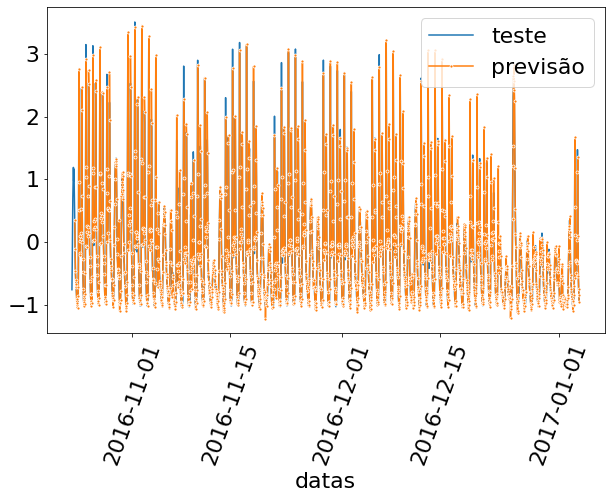

In [107]:
sns.lineplot(x='datas',y=yteste[:,0], data=bike[tamanho_treino:len(bike)],label='teste')
sns.lineplot(x='datas',y=y_predito[:,0], data=bike[tamanho_treino+10:len(bike)],marker='.',label='previsão')
plt.xticks(rotation=70) 

# Aula 5

In [108]:
from tensorflow.keras.layers import GRU

In [164]:
recorrente_g = Sequential()

In [165]:
recorrente_g.add(GRU(10, input_shape=(xtreino_novo.shape[1],xtreino_novo.shape[2])
                    ))
recorrente_g.add(Dense(units=1))

In [166]:
recorrente_g.compile(loss='mean_squared_error',optimizer='RMSProp')
recorrente_g.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_3 (GRU)                  (None, 10)                390       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [167]:
resultado2 = recorrente_g.fit(xtreino_novo,ytreino_novo,
                              validation_data=(xteste_novo,yteste_novo),epochs=100)

Epoch 1/100
490/490 [==============================] - 3s 7ms/step - loss: 0.4716 - val_loss: 0.1704
Epoch 2/100
490/490 [==============================] - 3s 6ms/step - loss: 0.1535 - val_loss: 0.0886
Epoch 3/100
490/490 [==============================] - 3s 6ms/step - loss: 0.1094 - val_loss: 0.0816
Epoch 4/100
490/490 [==============================] - 3s 6ms/step - loss: 0.0966 - val_loss: 0.0715
Epoch 5/100
490/490 [==============================] - 3s 6ms/step - loss: 0.0833 - val_loss: 0.0594
Epoch 6/100
490/490 [==============================] - 3s 6ms/step - loss: 0.0694 - val_loss: 0.0509
Epoch 7/100
490/490 [==============================] - 3s 6ms/step - loss: 0.0618 - val_loss: 0.0464
Epoch 8/100
490/490 [==============================] - 3s 7ms/step - loss: 0.0567 - val_loss: 0.0426
Epoch 9/100
490/490 [==============================] - 3s 7ms/step - loss: 0.0528 - val_loss: 0.0371
Epoch 10/100
490/490 [==============================] - 3s 7ms/step - loss: 0.0498 - val_lo

KeyboardInterrupt: 

In [ ]:
y_predito2 = recorrente_g.predict(xteste_novo)

In [ ]:
sns.lineplot(x='datas',y=yteste[:,0], data=bike[tamanho_treino:len(bike)])
sns.lineplot(x='datas',y=y_predito2[:,0], data=bike[tamanho_treino+10:len(bike)],marker='.')
plt.legend(['conhecido','estimado'])
plt.xticks(rotation=70) 

In [ ]:
print(resultado2.history.keys())

In [ ]:
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])
plt.legend(['treino','teste'])

In [ ]:
plt.plot(resultado2.history['loss'])
plt.plot(resultado2.history['val_loss'])
plt.legend(['treino','teste'])


# Dados multivariados

In [109]:
xtreino_novo, ytreino_novo = separa_dados(vetor,10)
xteste_novo, yteste_novo = separa_dados(vetor2,10)

In [110]:
type(separa_dados)

function

In [111]:
xtreino_novo

array([[-0.88574518, -0.9262953 , -0.92998167, ..., -0.9843557 ,
        -0.93274645, -0.77607553],
       [-0.9262953 , -0.92998167, -0.98712048, ..., -0.93274645,
        -0.77607553, -0.56687377],
       [-0.92998167, -0.98712048, -1.01016032, ..., -0.77607553,
        -0.56687377, -0.38347663],
       ...,
       [-0.02774148, -0.29131727, -0.4323211 , ..., -0.72630948,
        -0.8534894 , -0.91523618],
       [-0.29131727, -0.4323211 , -0.51065656, ..., -0.8534894 ,
        -0.91523618, -0.9548647 ],
       [-0.4323211 , -0.51065656, -0.55212827, ..., -0.91523618,
        -0.9548647 , -0.9548647 ]])

In [112]:
yt = sc2.transform(bike['temperatura'].values.reshape(-1,1))

In [ ]:
ytreinot = yt[0:tamanho_treino]
ytestet =  yt[tamanho_treino:len(bike)]

In [ ]:
vetort = pd.DataFrame(ytreinot)[0]
vetort2 = pd.DataFrame(ytestet)[0]

In [ ]:
xtreino_novot, ytreino_novot = separa_dados(vetort,10)
xteste_novot, yteste_novot = separa_dados(vetort2,10)

In [ ]:
xtreino_novo2 = np.append(xtreino_novo,xtreino_novot, axis=1)
xteste_novo2 = np.append(xteste_novo,xteste_novot, axis=1)

In [ ]:
xtreino_novo2 = xtreino_novo2[:,0:11]
xteste_novo2 = xteste_novo2[:,0:11]

In [ ]:
xtreino_novo2 = xtreino_novo2.reshape((xtreino_novo2.shape[0],xtreino_novo2.shape[1],1))
xteste_novo2 = xteste_novo2.reshape((xteste_novo2.shape[0],xteste_novo2.shape[1],1))

In [ ]:
xteste_novo2.shape

In [ ]:
xtreino_novo2.shape

In [ ]:
recorrentet = Sequential()

In [ ]:
recorrentet.add(LSTM(128, input_shape=(xtreino_novo2.shape[1],xtreino_novo2.shape[2])))
recorrentet.add(Dense(units=1))

In [ ]:
recorrentet.compile(loss='mean_squared_error',optimizer='RMSProp')
recorrentet.summary()

In [ ]:
xtreino_novo2.shape

In [ ]:
resultado = recorrentet.fit(xtreino_novo2,ytreino_novo,epochs=10) 

In [ ]:
y_predito2 = recorrentet.predict(xteste_novo2)

In [ ]:
sns.lineplot(x='datas',y=yteste[:,0], data=bike[tamanho_treino:len(bike)])
sns.lineplot(x='datas',y=y_predito2[:,0], data=bike[tamanho_treino+10:len(bike)],marker='.')
plt.legend(['conhecido','estimado'])
plt.xticks(rotation=70)